<a href="https://colab.research.google.com/github/Sanjan193/Housing-Price-Prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit

In [37]:
housing_df = pd.read_csv('/content/archive (4) (1).zip')
# housing_df.info()
housing_df

#[longitude	latitude, housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# the 'total_bedrooms' has missing values.....so I'm updating the missing values with the median values

median = housing_df['total_bedrooms'].median()
housing_df['total_bedrooms'].fillna(median,inplace=True)
# plotting = pd.DataFrame(final_train_set_features,columns=[
#     "Age",
#     "Gender",
#     "Air Pollution",
#     "Alcohol use",
# …for_plotting

/tmp/ipython-input-4037091723.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['total_bedrooms'].fillna(median,inplace=True)


updating the "ocean_proximity" feature by assigning some numbers because its string but in computer we need numbers to represent this.....like

"<1H OCEAN"	: 0

"INLAND" : 1

"NEAR OCEAN" : 2

"NEAR BAY" : 3

"ISLAND" : 4

In [6]:
mapping ={

"<1H OCEAN" : 0,

"INLAND" : 1,

"NEAR OCEAN" :2,

"NEAR BAY" : 3,

"ISLAND" : 4

}

housing_df['ocean_proximity'] = housing_df['ocean_proximity'].map(mapping)

# **Train test splitting**

In [7]:
# this function is alerady built in the sikitlearn(so that was for learning function)


# def train_test_splitting(data,test_ratio):
#   np.random.seed(42) #this method does not continously mixes the numbers...and prevents the over fitting in the model
#   shuffling_data = np.random.permutation(len(data))
#   print(shuffling_data)
#   test_set_size = int(len(data)*test_ratio)
#   test_index = shuffling_data[:test_set_size]
#   train_index = shuffling_data[test_set_size:]
#   return data.iloc[test_index], data.iloc[train_index]

In [8]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing_df,test_size=0.2,random_state=42)

In [9]:
print((train_set))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  media

**To distribute the data set on basis of fequal ration of the most important parameter(here 'ocean_proximity') we will use stratified shuffle split.**

In [10]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing_df, housing_df['ocean_proximity']):

  strat_train_set = housing_df.loc[train_index]
  strat_test_set = housing_df.loc[test_index]

now we have got

strat_train_set---
strat_test_set

set

In [38]:
# strat_train_set['ocean_proximity'].value_counts()
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17602,-121.88,37.30,42.0,1867.0,398.0,927.0,389.0,4.3250,247000.0,0
12046,-117.52,33.88,21.0,722.0,178.0,770.0,165.0,2.5656,102500.0,1
16232,-121.30,37.97,52.0,2980.0,537.0,1128.0,510.0,4.0610,113600.0,1
984,-121.87,37.66,27.0,1569.0,242.0,583.0,214.0,5.7519,278500.0,1
608,-122.08,37.68,37.0,848.0,202.0,314.0,205.0,2.3958,190800.0,3
...,...,...,...,...,...,...,...,...,...,...
20273,-119.23,34.17,18.0,6171.0,1490.0,2164.0,1210.0,3.6875,500001.0,2
7459,-118.18,33.92,29.0,749.0,185.0,708.0,196.0,2.4583,136900.0,0
10521,-117.69,33.55,3.0,1618.0,266.0,710.0,246.0,6.0743,274300.0,0
9082,-118.17,34.69,12.0,4881.0,803.0,2188.0,724.0,4.1667,171900.0,1


In [12]:
strat_test_set['ocean_proximity'].value_counts()

,count
ocean_proximity,
0,1827
1,1310
2,532
3,458
4,1


now the ratio of every feature inntrain and data set is fully maintained !!!!

In [13]:
corr_matrix = housing_df.corr() #corellation
corr_matrix['median_house_value']

,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049457
population,-0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000
ocean_proximity,0.021732


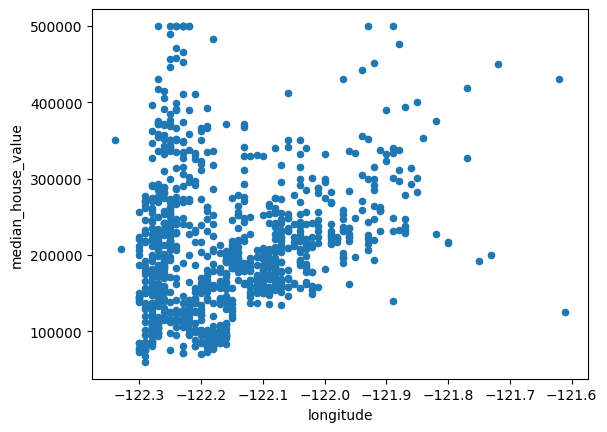

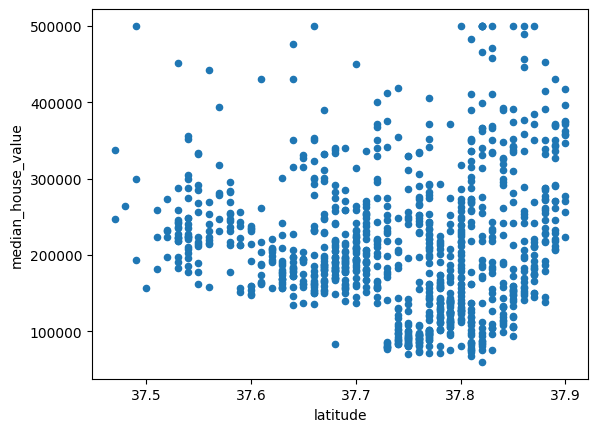

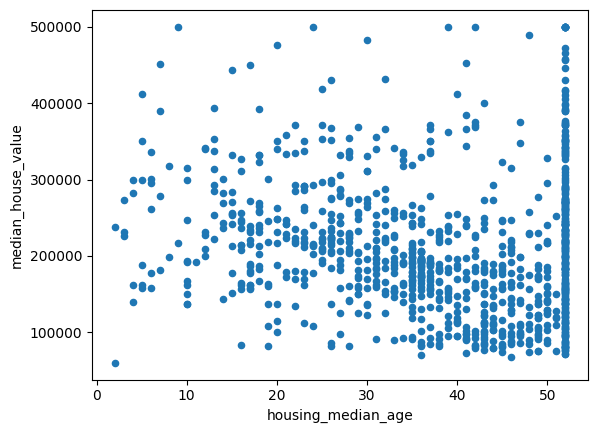

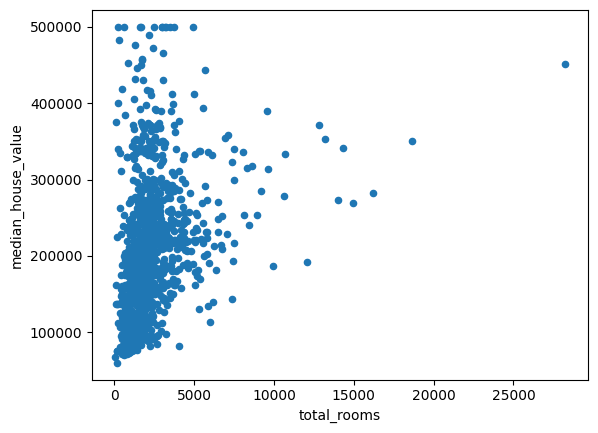

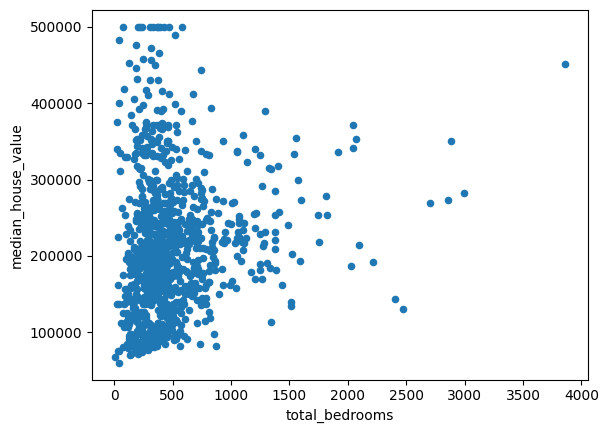

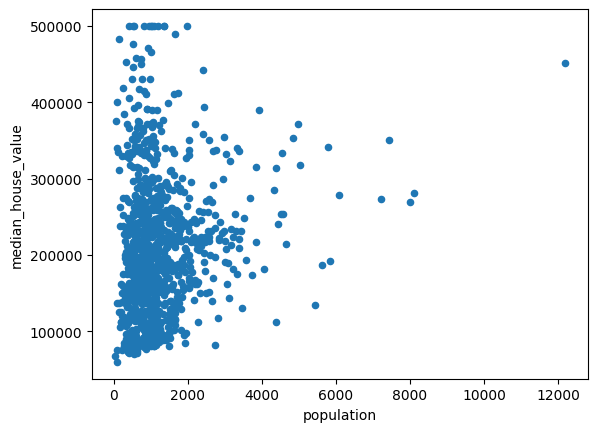

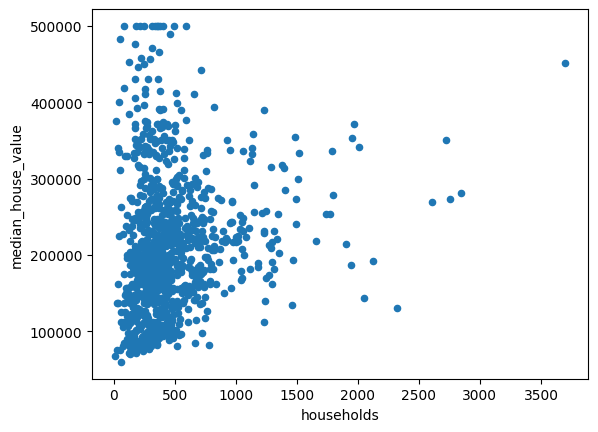

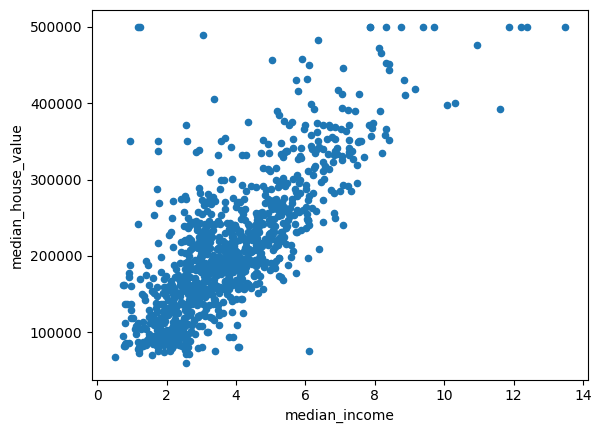

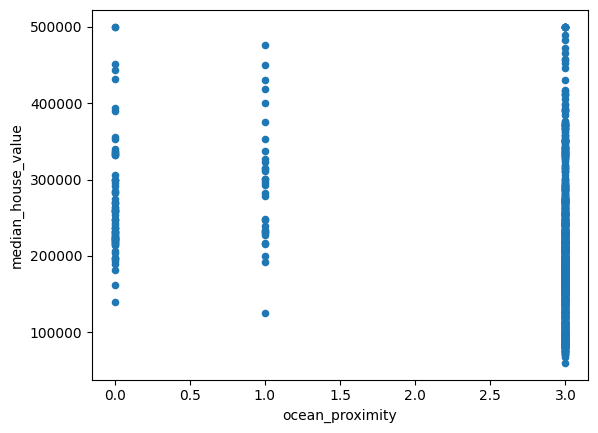

In [14]:
plot_list =['longitude','latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
for i in plot_list:

  # plt.hist(housing_df[i]) #,housing_df['median_house_value'])
  housing_df.head(1000).plot(kind='scatter',x=i,y='median_house_value')
  # plt.xlabel(i)
  # plt.ylabel("number of huouses")
  # plt.legend()
  plt.show()

In [15]:
# Train set
strat_train_set_features= strat_train_set.drop('median_house_value',axis=1)
strat_train_set_labels = strat_train_set['median_house_value'].copy()

#Test set
strat_test_set_features = strat_test_set.drop('median_house_value',axis=1)
strat_test_set_labels = strat_test_set['median_house_value'].copy()



#**Feature scaling**


now feature scaling is a method to limit(or adjust)our all features range in a perticularly similer range limit......because the model performes better in that data frame where the all features will be in a same limit scale.

there are mainly two types of feature scaling method :

1.Min-Max Scaling

2.Standardization

followbthat link :https://www.geeksforgeeks.org/machine-learning/Feature-Engineering-Scaling-Normalization-and-Standardization/



# **Creating Pipe line**

**pipe line is a type of function to automate to charge the model,stratagies by manipulating this code**

I'm using **Standardization** feature scaling her

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #importing Standardization

my_pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

housing_tr_train = my_pipeline.fit_transform(strat_train_set_features)
housing_tr_test = my_pipeline.fit_transform(strat_test_set_features)
print(housing_tr_train)
print(housing_tr_test)


[[-1.15518381  0.77944472  1.05689279 ... -0.28823697  0.24123582
  -0.90464799]
 [ 1.02714734 -0.82052583 -0.61409645 ... -0.87967281 -0.68965309
   0.09085668]
 [-0.86487371  1.09288924  1.85260195 ...  0.03124401  0.10155486
   0.09085668]
 ...
 [ 0.94205644 -0.97490895 -2.04637294 ... -0.66580539  1.16678087
  -0.90464799]
 [ 0.7017998  -0.44158544 -1.3302347  ...  0.59627647  0.15748015
   0.09085668]
 [-0.33931231  1.1209589  -0.61409645 ... -0.11661496 -0.48854426
   0.09085668]]
[[ 1.50565473 -0.55120211 -0.57914052 ...  1.2263434  -1.28774356
   0.0906716 ]
 [-1.3673166   1.11130544 -1.92284763 ...  0.96389887  0.01748012
   2.08158852]
 [-1.34757109  1.06434195  1.87114892 ... -0.2070075   0.60774314
   2.08158852]
 ...
 [ 1.14529922 -1.3260997  -0.81626531 ...  0.1891828  -0.03885824
   1.08613006]
 [ 1.2144085  -1.36836684 -1.52763966 ... -0.15149039 -0.92458812
   1.08613006]
 [-0.8983608   1.43535352  0.5274418  ... -0.57543925 -0.71853004
   0.0906716 ]]


#**Selecting model and training**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
# model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_tr_train,strat_train_set_labels)

RandomForestRegressor()

In [18]:
a = strat_train_set_features.iloc[:20]
# housing_df.info()

In [19]:
prepared_data = my_pipeline.fit_transform(a)

In [20]:
b=strat_train_set_labels

# **Calculating mean squared error**

In [21]:
from sklearn.metrics import mean_squared_error
c = model.predict(housing_tr_train) #the model will be overfitted here
mse = mean_squared_error(c,b)
rmse = np.sqrt(mse)
print(rmse)
# print("model is overfitted here")

18501.061008582503


# **Using Cross Validation**

its basically itrating model training by dropping each coloum one by one by per itration.....but including the previously dropped coloumn in the current train set and training the model again and again until the last coloumn falls under the dropping process.

ex :

itration 1 : training set [2,3,4,5]

itration 2 : training set [1,3,4,5]

itration 3 : training set [1,2,4,5]

itration 4 : training set [1,2,3,5]

itration 5 : training set [1,2,3,4]

In [22]:
from sklearn.model_selection import cross_val_score
error = cross_val_score(model,housing_tr_train,strat_train_set_labels,scoring="neg_mean_squared_error",cv = 10)
rmse_error = np.sqrt(-error)

print(rmse_error)


[49271.12609184 49601.73052991 51021.45936428 47461.36009119
 49714.56373507 47975.27406121 48534.32984773 51607.52814412
 51395.39276296 49714.45792875]


# **Calculating mean and standard daviationn of models:**

In [23]:
def mean_std(mean_errors):
  print(f"Mean ={mean_errors.mean()}")
  print(f"standard daviation  ={mean_errors.std()}")

print(mean_std(rmse_error))


Mean =49629.72225570683
standard daviation  =1332.248904688346
None


1.Model = Random Forest regression

     Mean =49655.329727783785
     standard daviation  =1333.7992048280914
2.Model = Desition tree

      Mean =69148.42612449515
      standard daviation  =1750.28882786171

3.Model = LinearRegression

      Mean =70470.88710540305
      standard daviation  =2392.8754488457143      

# **Testing the model**

In [33]:
# now use the test set
test_data = my_pipeline.fit_transform(strat_test_set_features)
output  = model.predict(test_data)
mse_final = mean_squared_error(output,strat_test_set_labels)
rmse_final = np.sqrt(mse_final)
# print(rmse_final)

# ---------------------------------------------------------------
#predicted values
h= pd.DataFrame(output)
# print("This is the predicted house prices")
h


,0
0,90956.00
1,173953.00
2,310624.00
3,284585.02
4,267129.01
...,...
4123,102883.00
4124,307014.02
4125,290898.05
4126,153233.00


In [32]:
print("These are the actual house prices in test set ")

strat_test_set_labels

These are the actual house prices in test set 


,median_house_value
13900,51300.0
1720,112500.0
401,232200.0
9360,271300.0
16978,270900.0
...,...
13981,157700.0
5387,320000.0
14437,112500.0
14246,92600.0


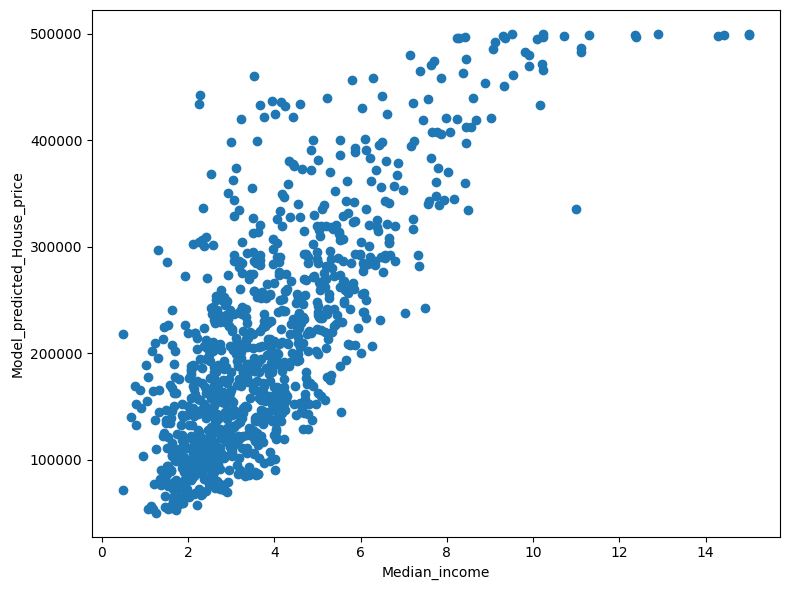

In [65]:
# Plotting the predicted result with respect to the most important corelated feature
Median_income= strat_test_set['median_income']
plt.figure(figsize= (8,6))
plt.scatter(Median_income.iloc[0:2000],h[0:2000])
plt.xlabel("Median_income")
plt.ylabel("Model_predicted_House_price")
plt.tight_layout()
plt.show()
# Median_income.max()

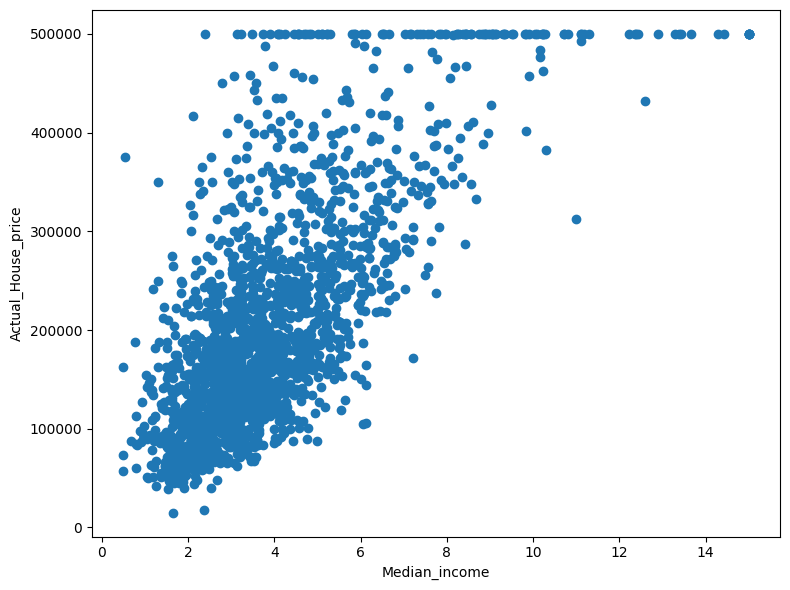

In [66]:
# Plotting the actual prices with respect to the most important corelated feature
plt.figure(figsize= (8,6))
plt.scatter(Median_income.iloc[0:2000],strat_test_set_labels[0:2000])
plt.xlabel("Median_income")
plt.ylabel("Actual_House_price")
plt.tight_layout()
plt.show()

In [26]:
rmse_final # this is the final error of our model

np.float64(52006.72713324404)

# **Downloading the model**

In [27]:
# import joblib

# joblib.dump(model,'House_price_predictor.joblib')


# from google.colab import files
# files.download('House_price_predictor.joblib')